<a href="https://colab.research.google.com/github/cgmassobrio/CEIA-VCI/blob/main/graf_10K_dataset-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráficos del dataset N°1 - SR 10K
Se grafican las mediciones del dataset con las muestras registradas a una frecuencia de muestreo a 10K.

## Librerías y dataset
Se enlistan las librerías a utilizar para la exploración del dataset

In [ ]:
# Librerías principales
import numpy as np # álgebra lineal
import pandas as pd
import matplotlib

# Herramientas para graficar
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import Grid
from matplotlib import ticker

# Cálculo/Estadística
from scipy import signal

# Manipulación de archivos
import os

# Versiones de librerías
print("".join(f"{x[0]}: {x[1]}\n" for x in [
    ("Pandas",pd.__version__),
    ("Numpy",np.__version__),
    ('Matplotlib',matplotlib.__version__)
]))

Pandas: 2.0.3
Numpy: 1.25.2
Matplotlib: 3.7.1



Se levanta el dataset

In [ ]:
# Conexión a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta en Drive
DATASET_PATH = '/content/drive/MyDrive/Colab Notebooks/teknais_repos/PINN-vibraciones_prueba-y-evaluacion/data'

# Ruta alojamiento
# DATASET_PATH = '/data'

In [ ]:
# Lectura desde Drive
vib_data_10K = pd.read_csv(DATASET_PATH+'/vib_data_10K.csv', delimiter=',')

# Lectura directa
# data-vib_1 = pd.read_csv(DATASET_PATH+'MEMS_Log_Logger Completo.csv', delimiter=',')

In [ ]:
# Panorama
vib_data_10K.head()

,Record,Time,MEMS-X [m/s2],MEMS-Y [m/s2],MEMS-Z [m/s2],MEMS-UNI [m/s2],SUP_Voltage [V],IEPE-1 [m/s2],IEPE-2 [m/s2]
0,20:37:46,0.0000,-0.434,0.728,-9.477,9.2075,2.48,-0.12,-0.36
1,20:37:46,0.0001,-0.450,0.729,-9.473,9.1933,2.48,-0.13,-0.34
2,20:37:46,0.0002,-0.481,0.703,-9.465,9.2079,2.48,-0.10,-0.32
3,20:37:46,0.0003,-0.502,0.697,-9.444,9.1938,2.48,-0.10,-0.36
4,20:37:46,0.0004,-0.510,0.660,-9.429,9.1864,2.48,-0.13,-0.30


In [ ]:
vib_data_10K.describe()

,Time,MEMS-X [m/s2],MEMS-Y [m/s2],MEMS-Z [m/s2],MEMS-UNI [m/s2],SUP_Voltage [V],IEPE-1 [m/s2],IEPE-2 [m/s2]
count,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000
mean,22.499950,-0.628178,0.487006,-9.662835,9.204034,2.480000,-0.130950,-0.285005
std,12.990395,2.273582,6.550484,4.764960,4.117797,0.000047,4.320608,1.177464
min,0.000000,-11.447000,-19.565000,-24.366000,-16.620100,2.470000,-20.910000,-7.050000
25%,11.249975,-0.996000,-0.282000,-10.309000,8.560800,2.480000,-0.810000,-0.510000
50%,22.499950,-0.644000,0.469000,-9.814000,9.188600,2.480000,-0.140000,-0.280000
75%,33.749925,-0.331000,1.477000,-9.280000,9.549025,2.480000,0.160000,-0.030000
max,44.999900,10.927000,21.303000,12.923000,32.864600,2.480000,29.870000,6.510000


## Visualización de los datos
Se grafica las aceleraciones en las direcciones x-y-z. Se separan las columnas para tal fin, creando una nueva tabla.

In [ ]:
data_xyz = vib_data_10K.iloc[:,1:6]
data_xyz.head()

,Time,MEMS-X [m/s2],MEMS-Y [m/s2],MEMS-Z [m/s2],MEMS-UNI [m/s2]
0,0.0000,-0.434,0.728,-9.477,9.2075
1,0.0001,-0.450,0.729,-9.473,9.1933
2,0.0002,-0.481,0.703,-9.465,9.2079
3,0.0003,-0.502,0.697,-9.444,9.1938
4,0.0004,-0.510,0.660,-9.429,9.1864


In [ ]:
# Función para definir las características de cada subgráfico
def sub_plot(x, y, colors, font_title, font_label, a=1, sub_title=''):
    '''
    Función para configurar cada subgráfico.
    x: datos para ordenadas.
    y: datos para abscisas.
    font_title: tamaño de la fuente del subtítulo.
    font_label: tamaño de la fuente en ejes.
    a: espacio entre principio y fin.
    sub_title: subtítulo
    '''
    ax.plot(x, y, color=colors)

    ax.set_xlim(-a, x.iloc[-1]+a)
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
    ax.grid(True)

    ax.set_xlabel('tiempo de muestreo (s)', fontsize=font_label)
    ax.set_ylabel('aceleración ($m/s^{2}$)', fontsize=font_label)
    ax.set_title(sub_title, fontsize=font_title)

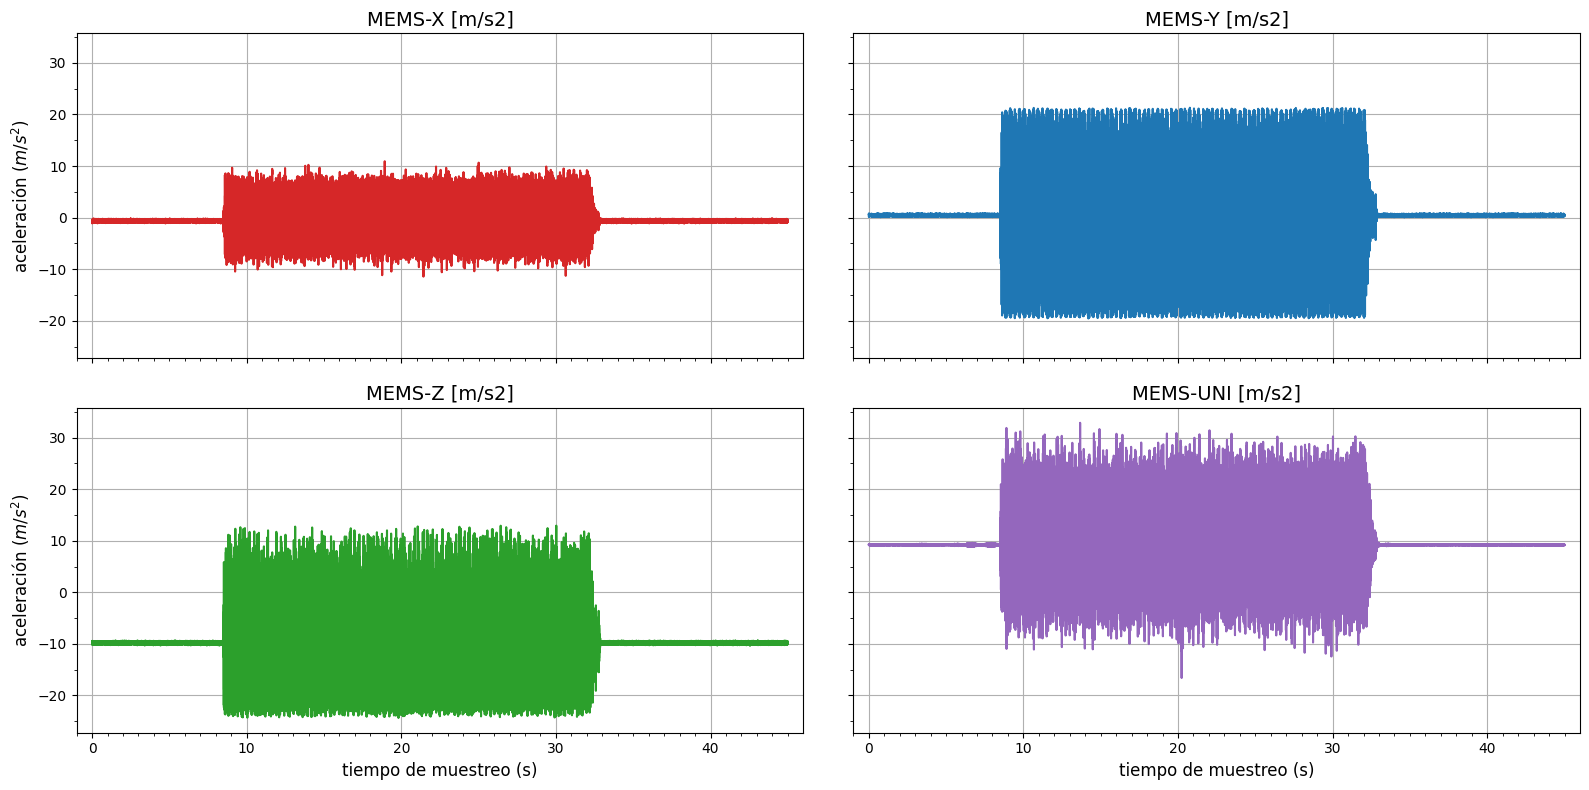

In [ ]:
# Set de colores
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple']

# Desarrollo de gráficos en una matriz
fig = plt.figure(1, figsize=(16,8))
grid = Grid(fig, rect=111, nrows_ncols=(2, 2),
            axes_pad=0.5, label_mode='L', share_all=True,
            )

k=0
for ax in grid:
    sub_plot(data_xyz['Time'], data_xyz.iloc[:,k+1], colors[k], 14, 12, sub_title='{}'.format(list(data_xyz.columns)[k+1]))
    k += 1

plt.tight_layout()

La excitación durante la prueba se realizó entre los 8.5s y los 33s apróximadamente (a confirmar).


## Extracción de períodos acotados de ensayo
Se busca observar los resultados del ensayo en un lapso de tiempo pequeño. Para este caso se tomará un período de tiempo 0.20s en los 5s y los 20s de ensayo. Como referencia se muestra la medición MEMS-X.

Text(0.5, 1.0, 'MEMS-X: extracción de muestras')

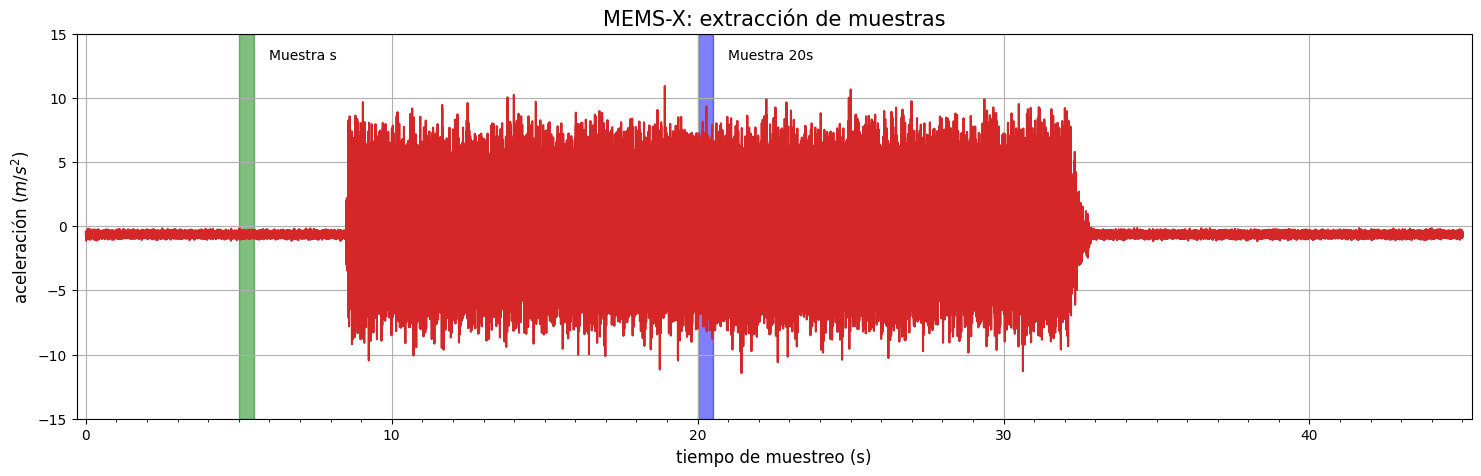

In [ ]:
fig, ax  = plt.subplots(1,1, figsize=(18, 5))

ax.plot(data_xyz['Time'], data_xyz.iloc[:,1], color='tab:red')
ax.set_xlim(-0.3, data_xyz['Time'].iloc[-1]+0.3)
ax.set_ylim(-15, 15)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.grid()
ax.fill_betweenx([-15, 15],20, 20.5, color ='blue', alpha = 0.5)
ax.fill_betweenx([-15, 15], 5, 5.5, color ='green', alpha = 0.5)
ax.text(data_xyz.index[21], 13, "Muestra 20s")
ax.text(data_xyz.index[6], 13, "Muestra s")
ax.set_xlabel('tiempo de muestreo (s)', fontsize=12)
ax.set_ylabel('aceleración ($m/s^{2}$)', fontsize=12)
ax.set_title(f'MEMS-X: extracción de muestras', fontsize=15)

In [ ]:
# Tiempos de extracción de muestras
point = [5, 20]

# Período de tiempo de la muestra
lag = 0.20

Intervalo para 5s: 2001 registros.


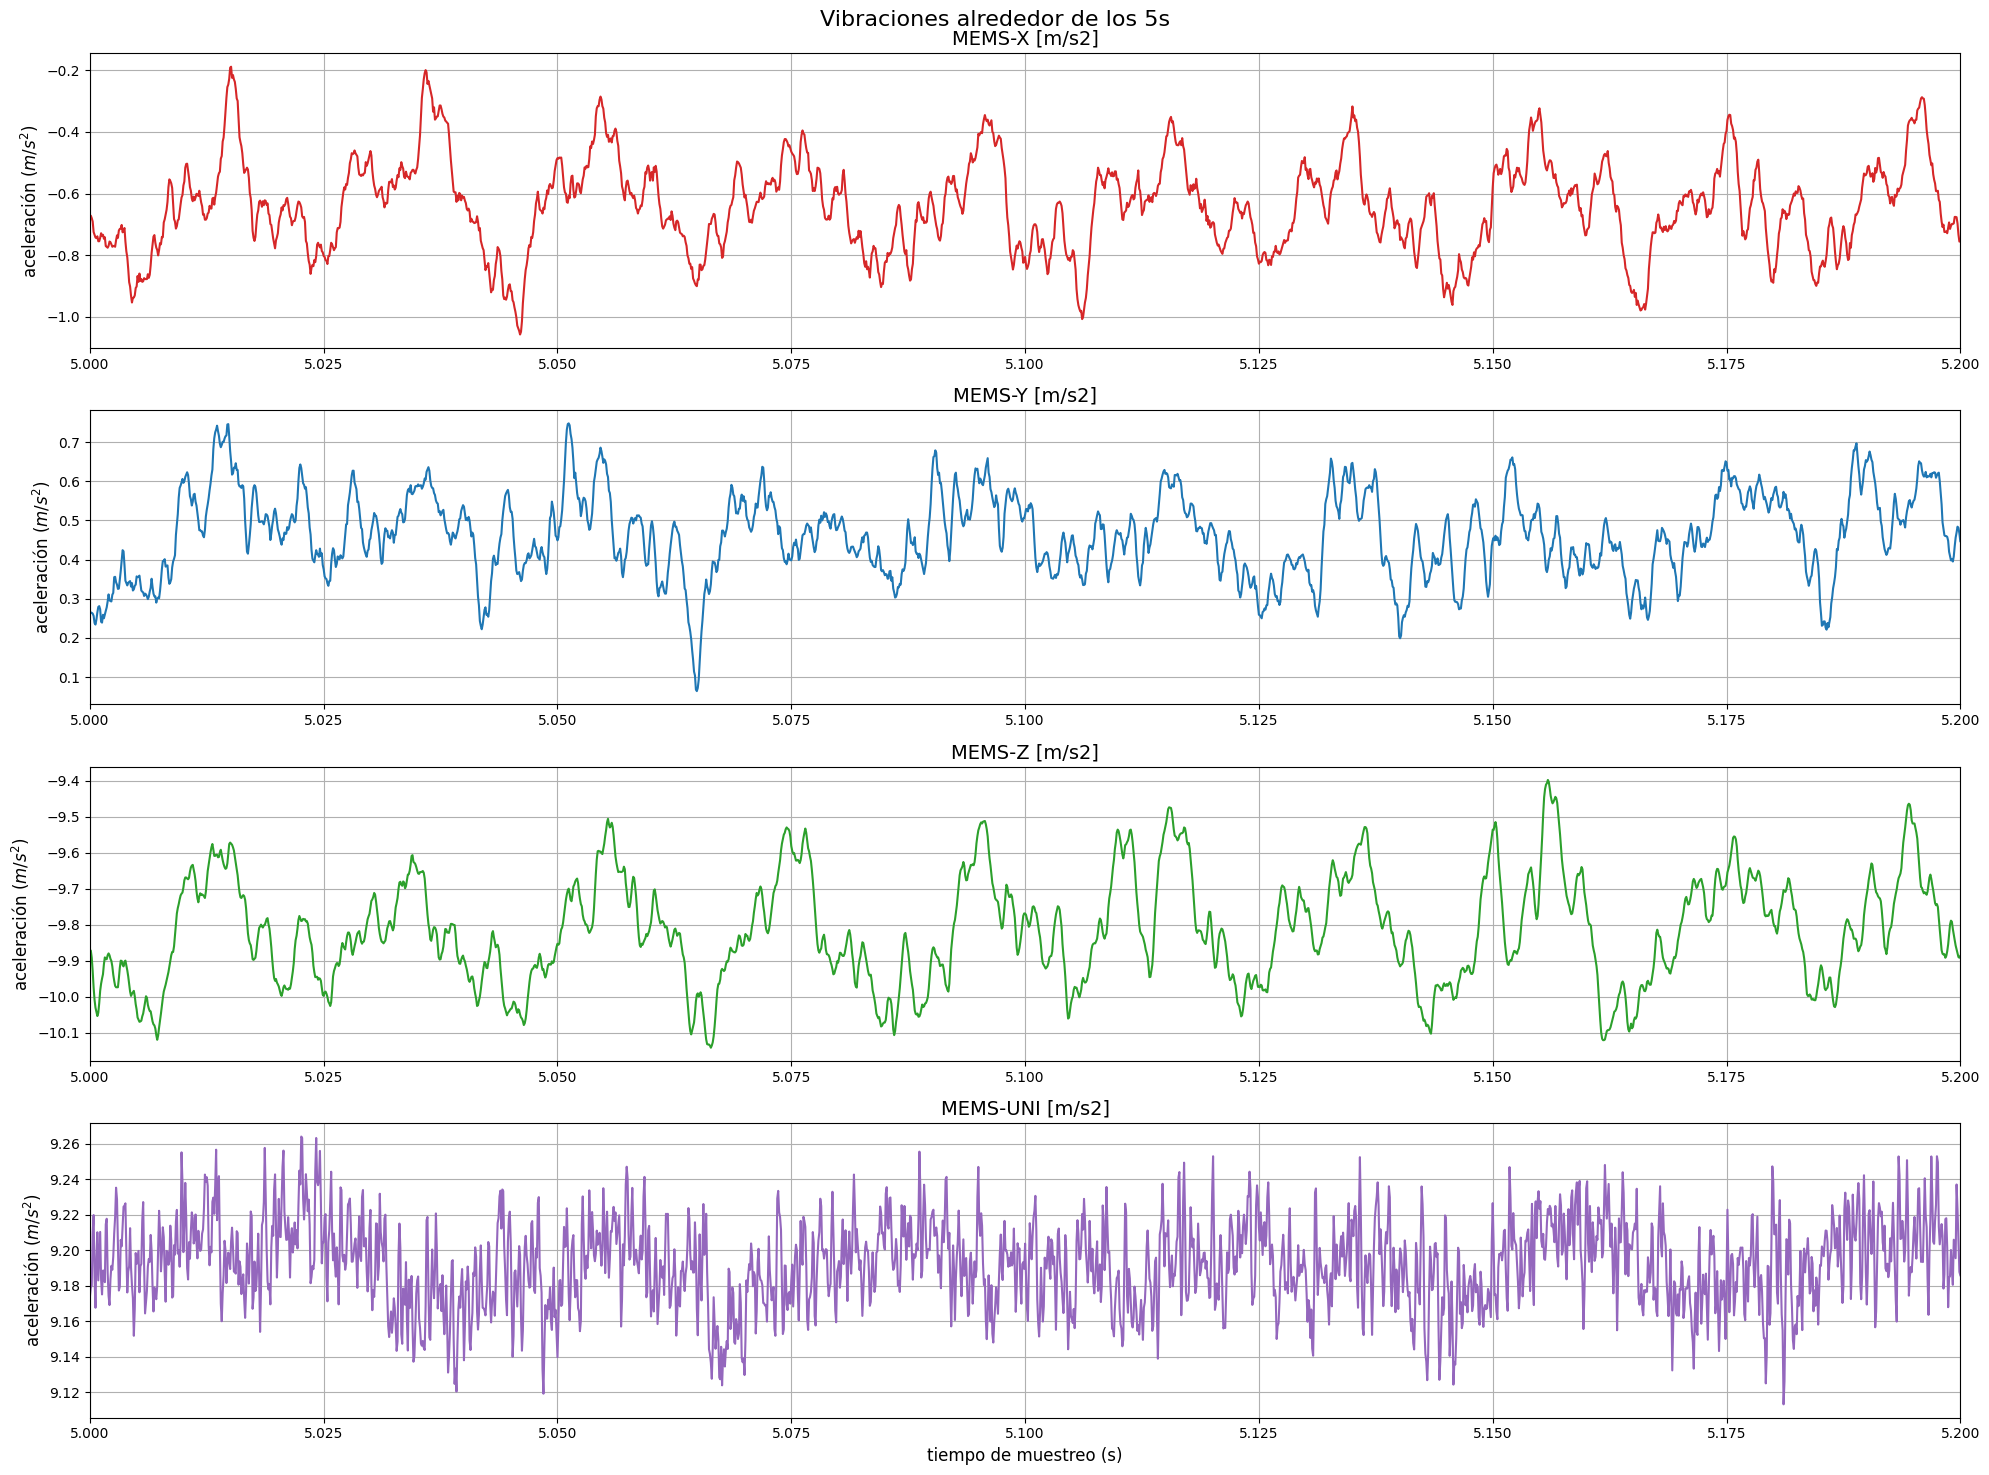

In [ ]:
# Muestras alrededor de t=5s
mask_5 = data_xyz.loc[(data_xyz['Time'] >= point[0]) & (data_xyz['Time'] <= (point[0]+lag))]

# Graficos para t=5s
fig, axs = plt.subplots(4, 1, figsize=(20, 15))
fig.suptitle(f'Vibraciones alrededor de los {int(point[0])}s', fontsize=16)
for i in range(4):
    axs[i].plot(mask_5['Time'], mask_5.iloc[:,i+1], color=colors[i])
    axs[i].set_xlim(mask_5['Time'].iloc[0], mask_5['Time'].iloc[-1])
    axs[i].grid(True)
    axs[i].set_ylabel('aceleración ($m/s^{2}$)', fontsize=12)
    axs[i].set_title('{}'.format(list(mask_5.columns)[i+1]), fontsize=14)

print(f'Intervalo para {int(point[0])}s: {len(mask_5)} registros.')

plt.xlabel('tiempo de muestreo (s)', fontsize=12)
plt.tight_layout()

Intervalo para 20s: 2001 registros.


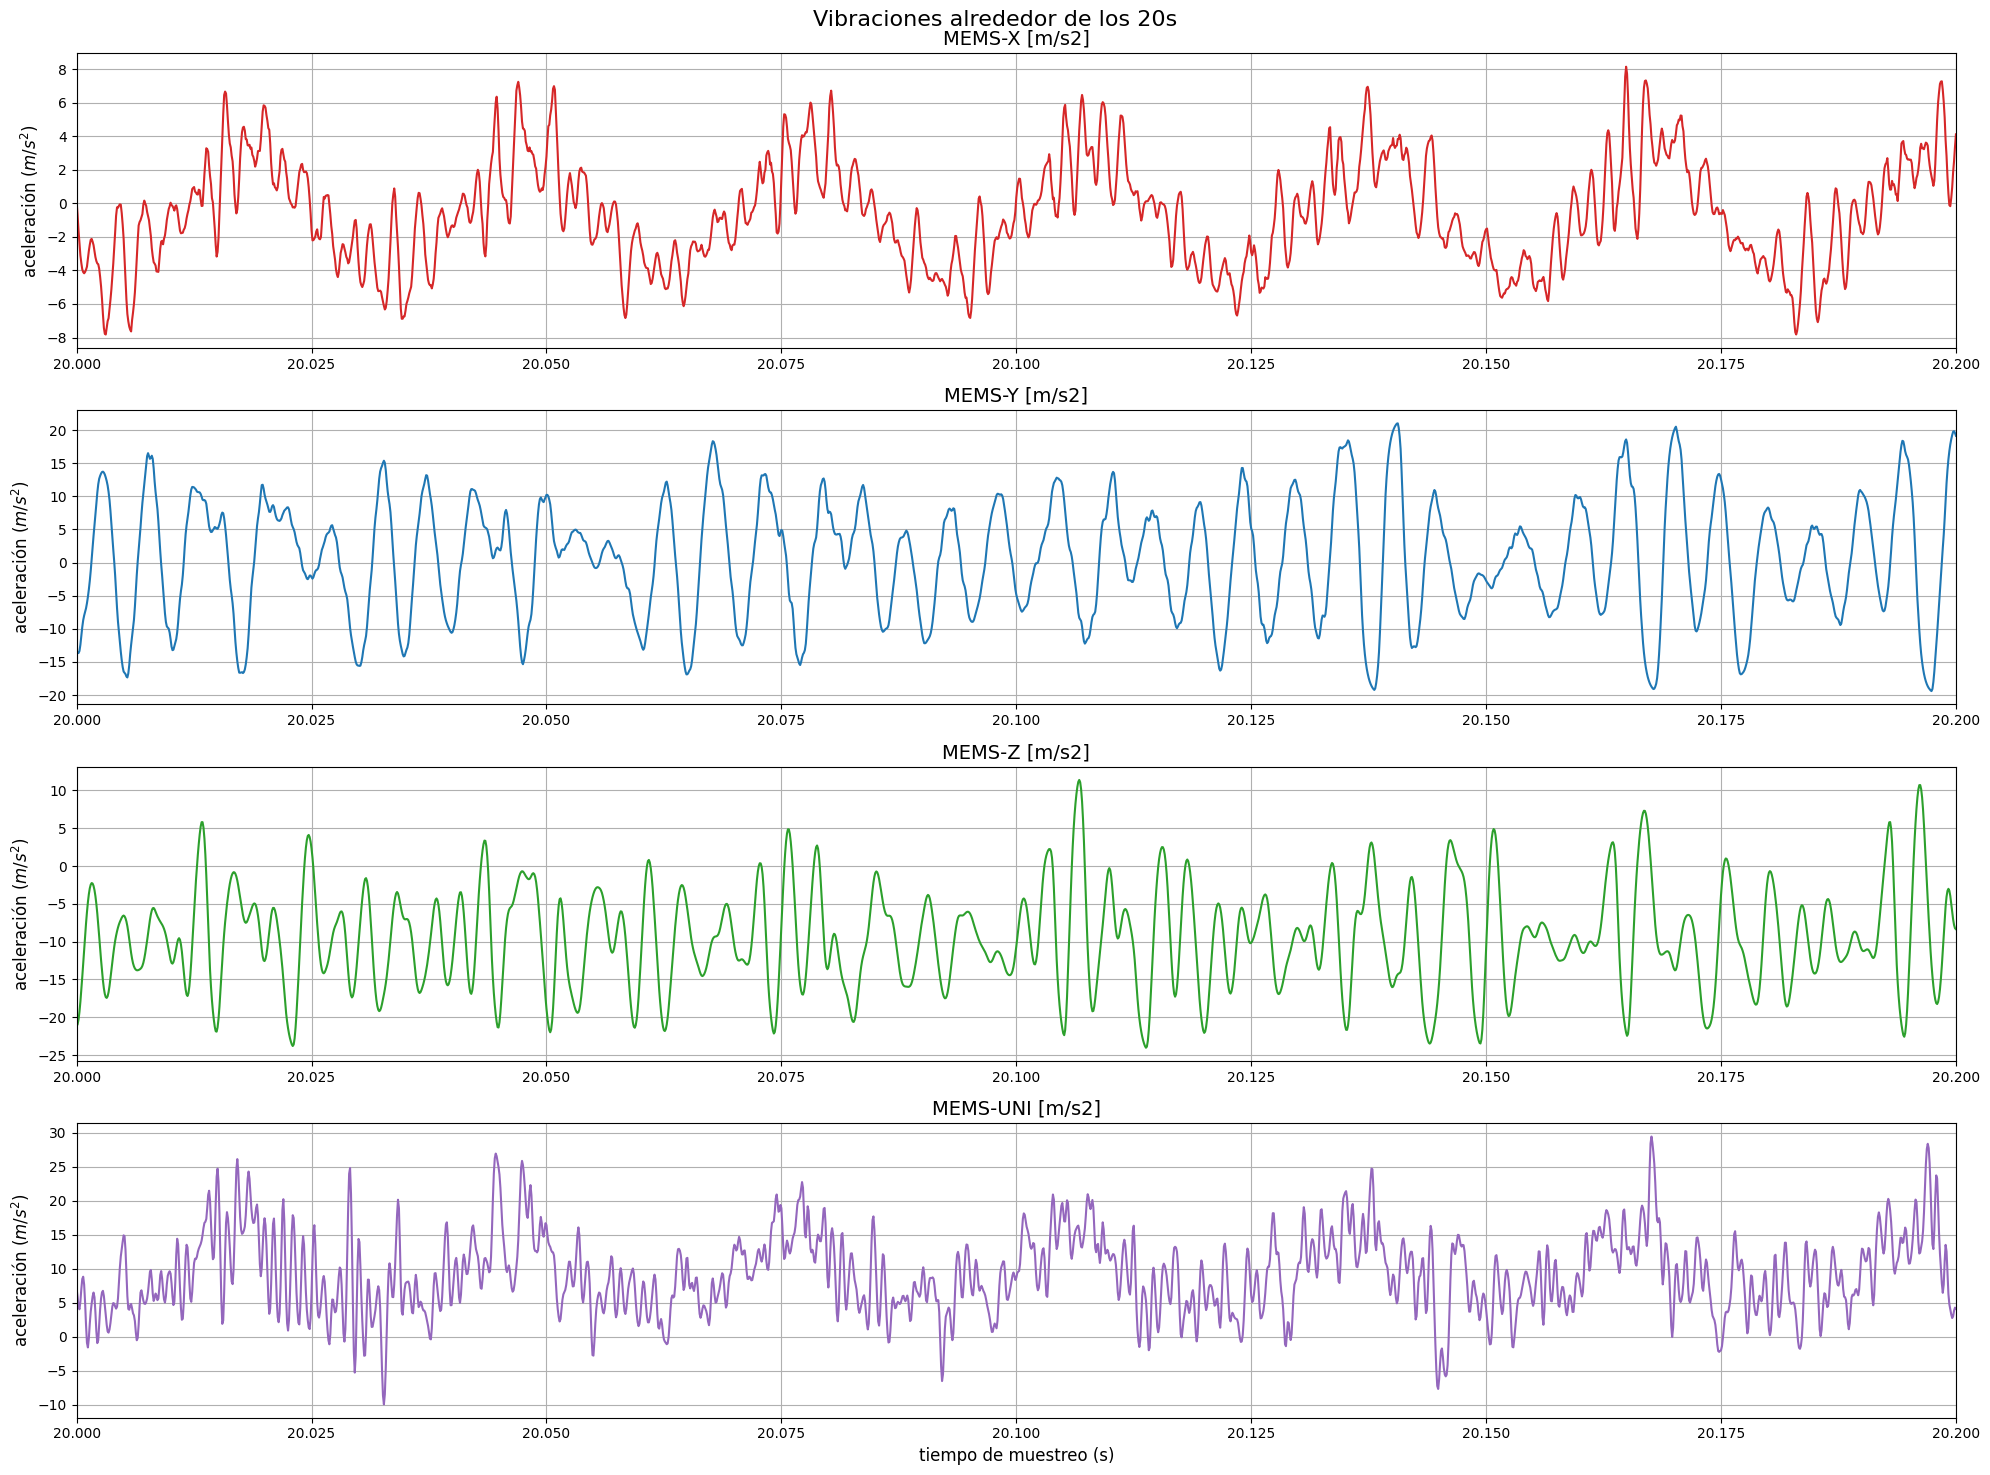

In [ ]:
# Muestras alrededor de t=20s
mask_20 = data_xyz.loc[(data_xyz['Time'] >= point[1]) & (data_xyz['Time'] <= (point[1]+lag))]

# Graficos para t=20s
fig, axs = plt.subplots(4, 1, figsize=(20, 15))
fig.suptitle(f'Vibraciones alrededor de los {int(point[1])}s', fontsize=16)
for i in range(4):
    axs[i].plot(mask_20['Time'], mask_20.iloc[:,i+1], color=colors[i])
    axs[i].set_xlim(mask_20['Time'].iloc[0], mask_20['Time'].iloc[-1])
    axs[i].grid(True)
    axs[i].set_ylabel('aceleración ($m/s^{2}$)', fontsize=12)
    axs[i].set_title('{}'.format(list(mask_20.columns)[i+1]), fontsize=14)

print(f'Intervalo para {int(point[1])}s: {len(mask_20)} registros.')

plt.xlabel('tiempo de muestreo (s)', fontsize=12)
plt.tight_layout()

## Respuesta en frecuencia
Por los resultados arrojados en los gráficos, se busca la respuesta en frecuencia para ver su comportamiento. Lo que se hará es separar el dataset en dos grupos:   
- El grupo representativo de la muestra t=5s: se toma el intervalo de muestras t=[0, 8].
- El grupo representativo de la muestra t=20s: se toma el intervalo de muestras t=[9, 31].


In [ ]:
# Intervalos para visualizar la respuesta en frecuencia
# Intervalo N°1
int_1 = [0, 8]

# Intervalo N°1
int_2 = [9, 31]

# Frecuencia de muestreo del ensayo
sr = 10e3

### Respuesta intervalo N°1

In [ ]:
# Dataset intervalo 1
mask_f1 = data_xyz.loc[(data_xyz['Time'] >= int_1[0]) & (data_xyz['Time'] <= int_1[1])]

In [ ]:
# Acumulador de las respuestas en frecuencias intervalo N°1
fr1_acum = []
A1_acum = []

# Respuestas en frecuencia intervalo N°1
for i in range(4):
    fr_1i, A_1i = signal.periodogram(mask_f1.iloc[:,i+1],len(mask_f1.iloc[:,i+1]))
    fr1_acum.append(fr_1i)
    A1_acum.append(A_1i)

In [ ]:
# Normalización a frecuencia de muestreo (el valor original está expresado en miles)
arr_sr1 = np.linspace(0, sr/2, len(fr1_acum[0]), dtype='float32')

Intervalo para t=[0, 8]s: 2001 registros.


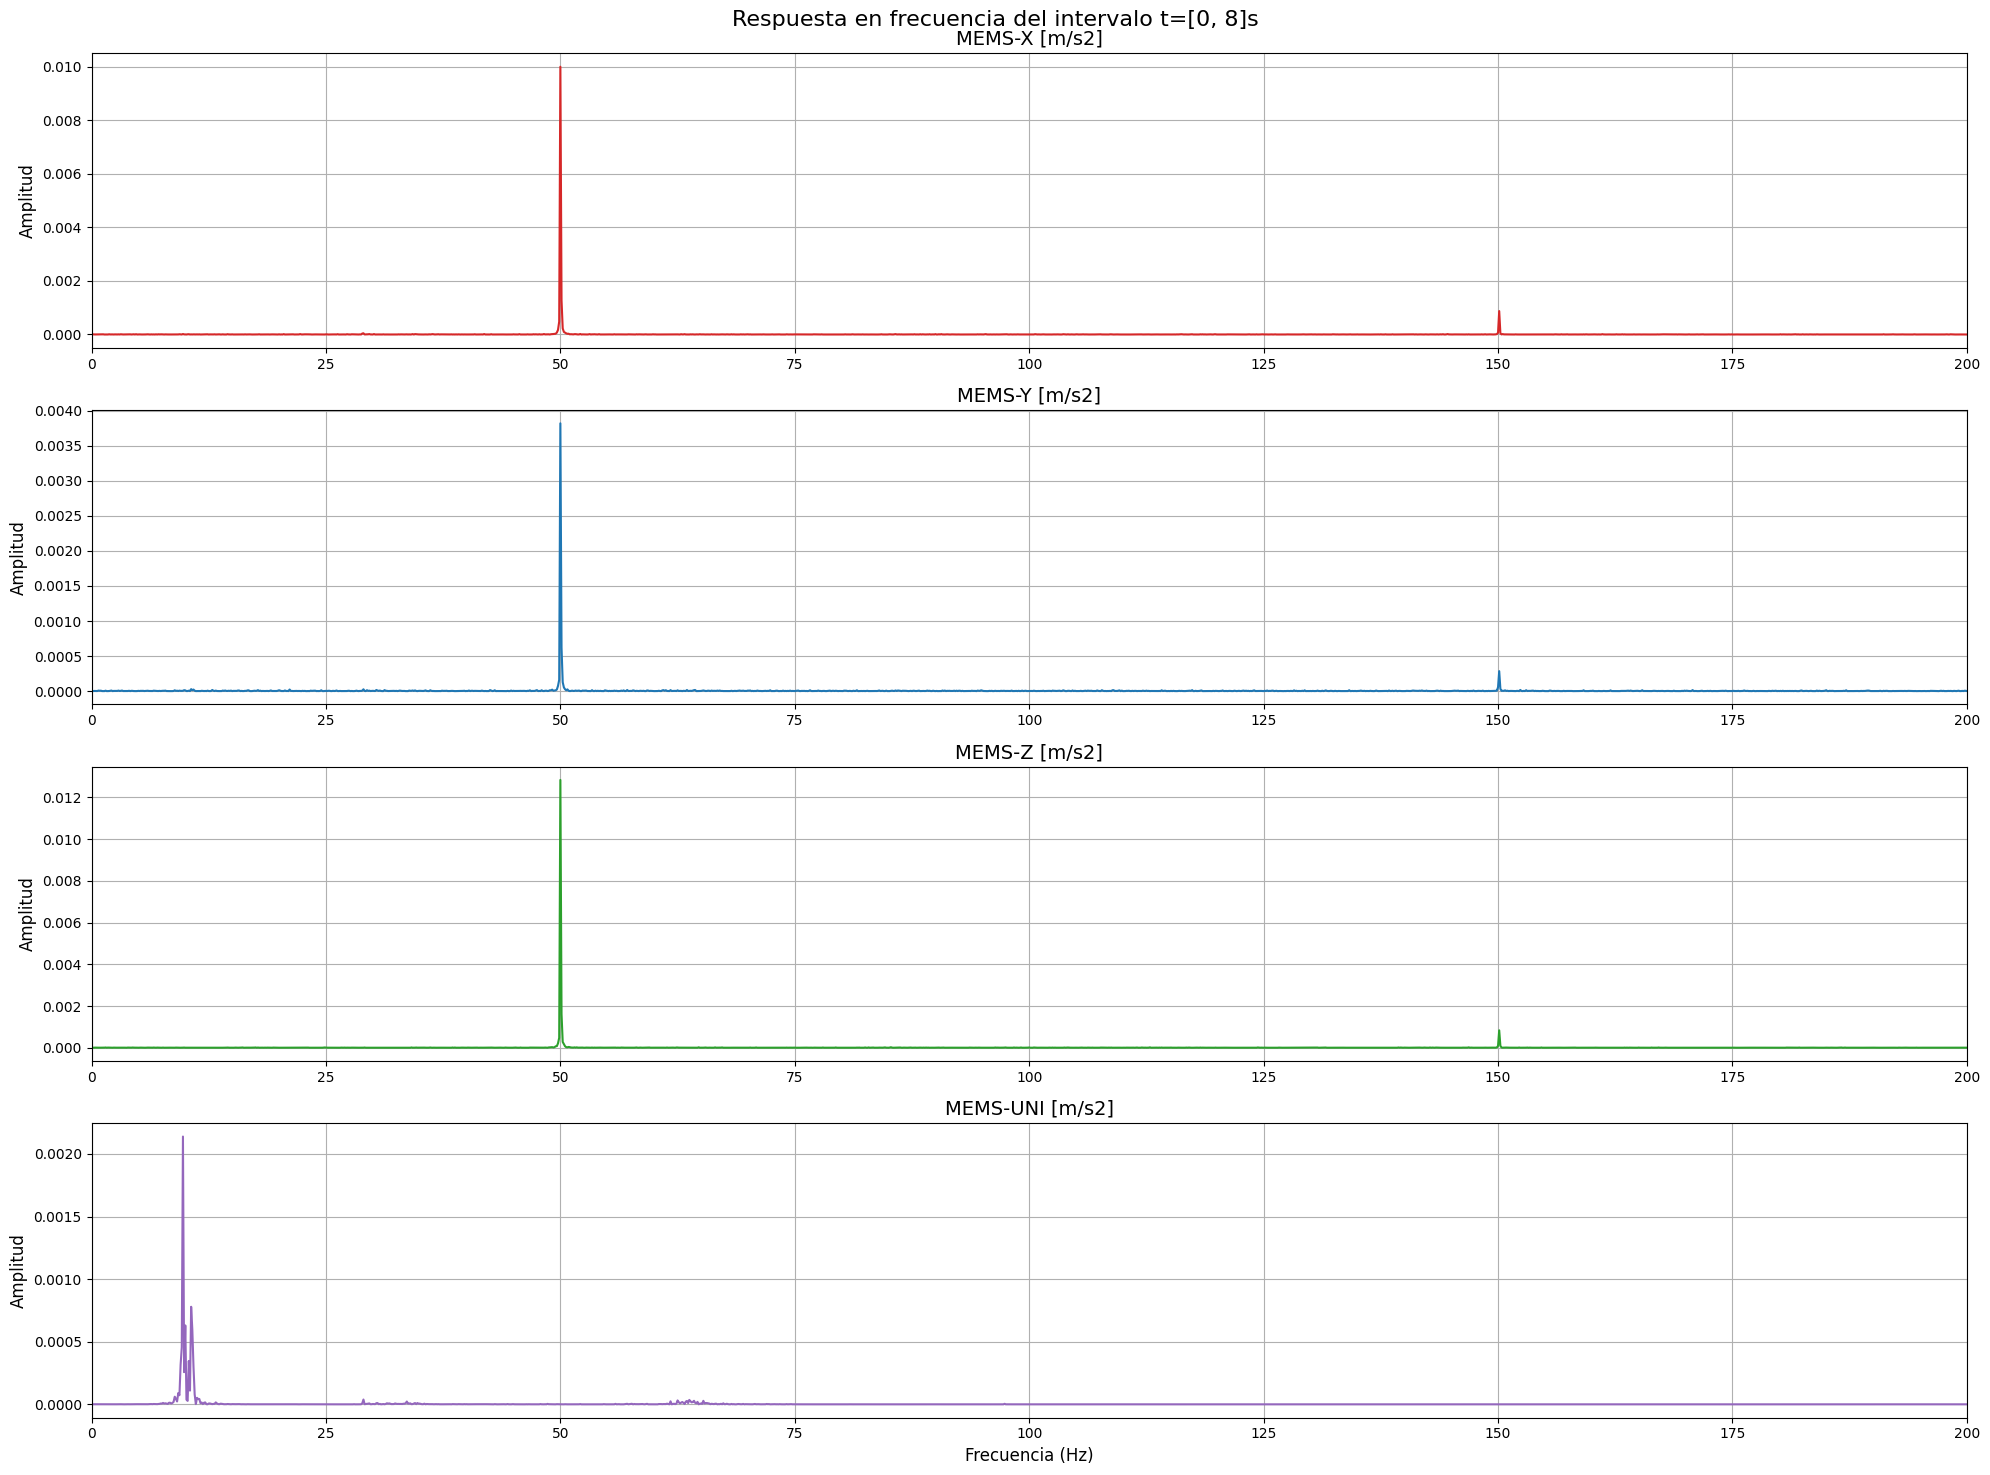

In [ ]:
# Gráficos respuesta en frecuencia intervalo N°1
fig, axs = plt.subplots(4, 1, figsize=(20, 15))
fig.suptitle(f'Respuesta en frecuencia del intervalo t={int_1}s', fontsize=16)
for i in range(4):
    axs[i].plot(arr_sr1, A1_acum[i], color=colors[i])
    axs[i].set_xlim(arr_sr1[0], 200)
    axs[i].grid(True)
    axs[i].set_ylabel('Amplitud', fontsize=12)
    axs[i].set_title('{}'.format(list(mask_f1.columns)[i+1]), fontsize=14)

print(f'Intervalo para t={int_1}s: {len(mask_f1)} registros.')

plt.xlabel('Frecuencia (Hz)', fontsize=12)
plt.tight_layout()

### Respuesta Intervalo N°2

In [ ]:
# Dataset intervalo 2
mask_f2 = data_xyz.loc[(data_xyz['Time'] >= int_2[0]) & (data_xyz['Time'] <= int_2[1])]

In [ ]:
# Acumulador de las respuestas en frecuencias intervalo N°2
fr2_acum = []
A2_acum = []

# Respuestas en frecuencia intervalo N°2
for i in range(4):
    fr_2i, A_2i = signal.periodogram(mask_f2.iloc[:,i+1],len(mask_f2.iloc[:,i+1]))
    fr2_acum.append(fr_2i)
    A2_acum.append(A_2i)

In [ ]:
# Normalización a frecuencia de muestreo (el valor original está expresado en miles)
arr_sr2 = np.linspace(0, sr/2, len(fr2_acum[0]), dtype='float32')

Intervalo para t=[9, 31]s: 220001 registros.


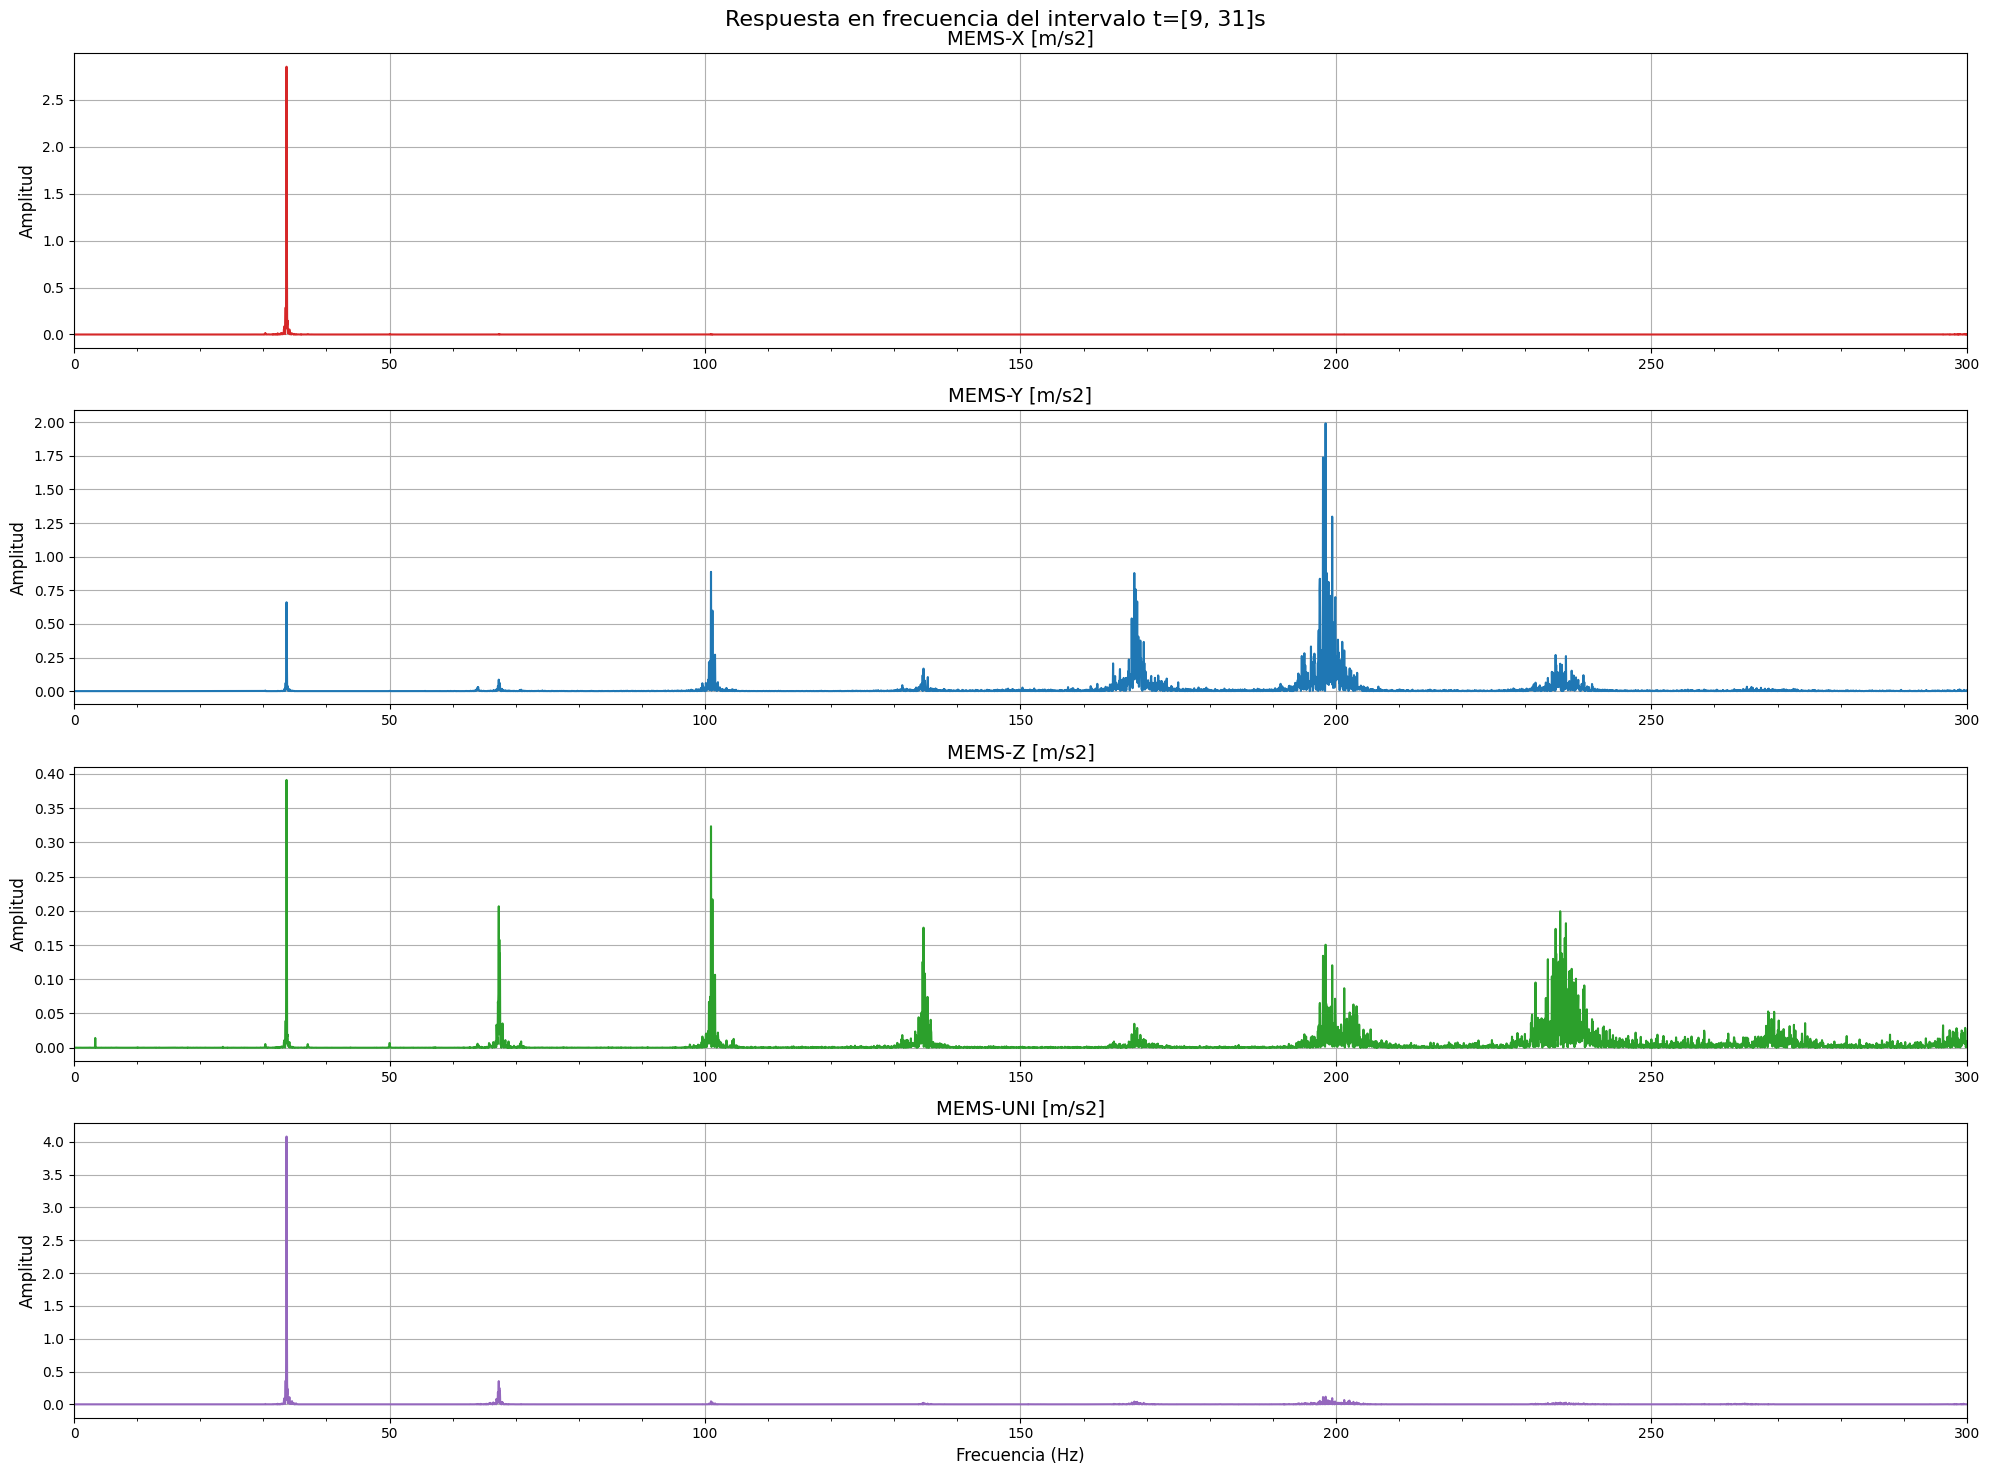

In [ ]:
# Gráficos respuesta en frecuencia intervalo N°2
fig, axs = plt.subplots(4, 1, figsize=(20, 15))
fig.suptitle(f'Respuesta en frecuencia del intervalo t={int_2}s', fontsize=16)
for i in range(4):
    axs[i].plot(arr_sr2, A2_acum[i], color=colors[i])
    axs[i].set_xlim(arr_sr2[0], 300)
    axs[i].grid(True)
    axs[i].xaxis.set_minor_locator(ticker.MultipleLocator(10))
    axs[i].yaxis.set_minor_locator(ticker.MultipleLocator(50))
    axs[i].set_ylabel('Amplitud', fontsize=12)
    axs[i].set_title('{}'.format(list(mask_f2.columns)[i+1]), fontsize=14)

print(f'Intervalo para t={int_2}s: {len(mask_f2)} registros.')

plt.xlabel('Frecuencia (Hz)', fontsize=12)
plt.tight_layout()